## Бибки

In [3]:
from datasets import load_dataset

ds = load_dataset("roneneldan/TinyStories")

README.md:   0%|          | 0.00/1.06k [00:00<?, ?B/s]

C:\Users\1\Jupyter Notebook\venv\lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\1\.cache\huggingface\hub\datasets--roneneldan--TinyStories. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


(…)-00000-of-00004-2d5a1467fff1081b.parquet:   0%|          | 0.00/249M [00:00<?, ?B/s]

(…)-00001-of-00004-5852b56a2bd28fd9.parquet:   0%|          | 0.00/248M [00:00<?, ?B/s]

(…)-00002-of-00004-a26307300439e943.parquet:   0%|          | 0.00/246M [00:00<?, ?B/s]

(…)-00003-of-00004-d243063613e5a057.parquet:   0%|          | 0.00/248M [00:00<?, ?B/s]

(…)-00000-of-00001-869c898b519ad725.parquet:   0%|          | 0.00/9.99M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/2119719 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/21990 [00:00<?, ? examples/s]

In [12]:
ds.save_to_disk("dataset_dict")

Saving the dataset (0/4 shards):   0%|          | 0/2119719 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/21990 [00:00<?, ? examples/s]

In [14]:
from datasets import load_from_disk
loaded_dataset_dict = load_from_disk("dataset_dict")

print(loaded_dataset_dict)

DatasetDict({
    train: Dataset({
        features: ['text'],
        num_rows: 2119719
    })
    validation: Dataset({
        features: ['text'],
        num_rows: 21990
    })
})


In [15]:
train_data = loaded_dataset_dict["train"]
train_data.to_csv("train_data.csv")

Creating CSV from Arrow format:   0%|          | 0/2120 [00:00<?, ?ba/s]

1921432169

## Начало работы

In [35]:
import pandas as pd
df = pd.read_csv("train_data.csv")

In [36]:
df

,text
0,"One day, a little girl named Lily found a need..."
1,"Once upon a time, there was a little car named..."
2,"One day, a little fish named Fin was swimming ..."
3,"Once upon a time, in a land full of trees, the..."
4,"Once upon a time, there was a little girl name..."
...,...
2119714,"Once upon a time, in a small town, there lived..."
2119715,"Once upon a time, there was a little boy named..."
2119716,"Once upon a time, there was a big tree. Under ..."
2119717,"Once upon a time, there was a little girl name..."


In [37]:
df = df [:10000]
df

,text
0,"One day, a little girl named Lily found a need..."
1,"Once upon a time, there was a little car named..."
2,"One day, a little fish named Fin was swimming ..."
3,"Once upon a time, in a land full of trees, the..."
4,"Once upon a time, there was a little girl name..."
...,...
9995,"Once upon a time, there was a graceful armchai..."
9996,Once there was a happy lady who loved carrying...
9997,"Once there was a little girl, Maria, who was v..."
9998,"One day, two sisters Anna and Bella were playi..."


In [44]:
import re
def split_text(text):
    text = text.lower()
    cleaned_text = re.sub(r'[^a-zA-Z\s]', '', text)
    words = cleaned_text.split()
    num_words = len(words)
    if num_words < 2:
        return cleaned_text, "" 
    split_point = num_words // 2
    part1 = ' '.join(words[:split_point]) if split_point > 0 else ""
    part2 = ' '.join(words[split_point:])

    return part1, part2


df[['part1', 'part2']] = df['text'].apply(split_text).apply(pd.Series)
df

C:\Users\1\AppData\Local\Temp\ipykernel_13404\1209587094.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['part1', 'part2']] = df['text'].apply(split_text).apply(pd.Series)
C:\Users\1\AppData\Local\Temp\ipykernel_13404\1209587094.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['part1', 'part2']] = df['text'].apply(split_text).apply(pd.Series)


,text,part1,part2
0,"One day, a little girl named Lily found a need...",one day a little girl named lily found a needl...,mom smiled and said yes lily we can share the ...
1,"Once upon a time, there was a little car named...",once upon a time there was a little car named ...,with them beep drove under the tree and watche...
2,"One day, a little fish named Fin was swimming ...",one day a little fish named fin was swimming n...,so fin swam to the top of the water and called...
3,"Once upon a time, in a land full of trees, the...",once upon a time in a land full of trees there...,the wind said you are special because you have...
4,"Once upon a time, there was a little girl name...",once upon a time there was a little girl named...,but she was scared of the spider that lived th...
...,...,...,...
9995,"Once upon a time, there was a graceful armchai...",once upon a time there was a graceful armchair...,fast asleep when he woke up he was still in th...
9996,Once there was a happy lady who loved carrying...,once there was a happy lady who loved carrying...,friendly rabbit passed by and offered the lady...
9997,"Once there was a little girl, Maria, who was v...",once there was a little girl maria who was ver...,try maria nodded shyly so daddy and maria walk...
9998,"One day, two sisters Anna and Bella were playi...",one day two sisters anna and bella were playin...,much fun until they heard a loud noise anna an...


In [31]:
from transformers import BertTokenizer
en_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [33]:
type(df['part1'])

pandas.core.series.Series

In [45]:
def encode(text, tokenizer, max_len):
    return tokenizer.encode(text)[:max_len]
    
X_en = en_tokenizer(
    list(df['part1']),
    padding=True,             # Добавление паддинга
    truncation=True,          # Усечение длинных текстов
    return_tensors="pt"      # Возвратить тензоры для PyTorch
)

Y_en = en_tokenizer(
    list(df['part2']),
    padding=True,
    truncation=True,
    return_tensors="pt"
)

In [46]:
X_en

{'input_ids': tensor([[ 101, 2028, 2154,  ...,    0,    0,    0],
        [ 101, 2320, 2588,  ...,    0,    0,    0],
        [ 101, 2028, 2154,  ...,    0,    0,    0],
        ...,
        [ 101, 2320, 2045,  ...,    0,    0,    0],
        [ 101, 2028, 2154,  ...,    0,    0,    0],
        [ 101, 2320, 2045,  ...,    0,    0,    0]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}

In [110]:
import torch
import torch.nn as nn

X = nn.utils.rnn.pad_sequence([
    torch.tensor(x, dtype=torch.long) for x in X_en['input_ids']
], padding_value = en_tokenizer.vocab_size).T
Y = nn.utils.rnn.pad_sequence([
    torch.tensor(x, dtype=torch.long) for x in Y_en['input_ids']
], padding_value = en_tokenizer.vocab_size)[:-2].T

C:\Users\1\AppData\Local\Temp\ipykernel_13404\3377537675.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(x, dtype=torch.long) for x in X_en['input_ids']
C:\Users\1\AppData\Local\Temp\ipykernel_13404\3377537675.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(x, dtype=torch.long) for x in Y_en['input_ids']


In [111]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.01)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

(torch.Size([9900, 444]),
 torch.Size([9900, 444]),
 torch.Size([100, 444]),
 torch.Size([100, 444]))

## Ме

In [ ]:
class PositionalEncoding(nn.Module):
    def __init__(self, seq_len, embed_dim):
        super(PositionalEncoding, self).__init__()

        pe = torch.zeros(seq_len, embed_dim)  # [seq_len, embed_dim]
        pos = torch.arange(0, seq_len, dtype=torch.long).unsqueeze(1)  # [seq_len, 1]
        i = torch.arange(0, embed_dim, dtype=torch.long)  # [embed_dim]
        
        buf = pos / 10000 ** (i / embed_dim)
        pe[..., 0::2] = torch.sin(buf)[..., 0::2]
        pe[..., 1::2] = torch.cos(buf)[..., 1::2]
        
        self.register_buffer('pe', pe)

    def forward(self, x):
        """
        Args:
            x: embedded input ~ [batch_size, seq_len, embed_dim]
        Returns:
            out: positional encoded ~ [batch_size, seq_len, embed_dim]
        """
        seq_len = x.size(1)
        return x + self.pe[:seq_len, :]

class MultiHeadAttention(nn.Module):
    def __init__(self, embed_dim=512, n_heads=8):
        super(MultiHeadAttention, self).__init__()

        assert embed_dim % n_heads == 0
        
        self.embed_dim = embed_dim  # d_model
        self.n_heads = n_heads
        self.single_head_dim = int(self.embed_dim / self.n_heads)

        self.n_head = n_heads
        self.Wq = nn.Linear(self.single_head_dim, self.single_head_dim, bias=False)
        self.Wk = nn.Linear(self.single_head_dim, self.single_head_dim, bias=False)
        self.Wv = nn.Linear(self.single_head_dim, self.single_head_dim, bias=False)
        self.Wo = nn.Linear(self.single_head_dim * self.n_heads, self.embed_dim)

    def split_into_heads(self, item, n_heads, dim_head):
        batch_size, seq_len, _ = item.shape  # [batch_size, seq_len, embed_dim]
        pre_heads = item.view(batch_size, seq_len, n_heads, dim_head)
        return pre_heads.transpose(1, 2)  # [batch_size, n_head, seq_len, dim_head]

    def join_heads(self, heads, d_model):
        batch_size, _, seq_len, _ = heads.shape
        return heads.transpose(1, 2).contiguous().view(batch_size, seq_len, d_model)  # [batch_size, seq_len, embed_dim]

    def forward(self, Q, K, V, with_mask=False):
        """
        Args:
            Q: [batch_size, seq_len, embed_dim]
            K: [batch_size, seq_len, embed_dim]
            V: [batch_size, seq_len, embed_dim]
            with_mask: for decoder
        Returns:
            out: [batch_size, seq_len, embed_dim]
        """

        Q_heads = self.split_into_heads(Q, self.n_head, self.single_head_dim)
        K_heads = self.split_into_heads(K, self.n_head, self.single_head_dim)
        V_heads = self.split_into_heads(V, self.n_head, self.single_head_dim)

        Q_heads = self.Wq(Q_heads)
        K_heads = self.Wk(K_heads)
        V_heads = self.Wv(V_heads)

        product = Q_heads.matmul(K_heads.transpose(-2, -1)) / np.sqrt(self.single_head_dim)  # [batch_size, n_head, seq_len, seq_len]

        if with_mask:
            batch_size, seq_len, _ = Q.shape
            mask = torch.tril(torch.ones(seq_len, seq_len)).expand(batch_size, 1, seq_len, seq_len)
            product = product.masked_fill(mask == 0, float('-1e20'))  # -inf

        scores = torch.softmax(product, dim=-1)  # [batch_size, n_head, seq_len, seq_len]
        scores = scores @ V_heads  # [batch_size, n_head, seq_len, dim_head]
        H = self.join_heads(scores, self.embed_dim)  # [batch_size, seq_len, embed_dim]

        return self.Wo(H)  # [batch_size, seq_len, embed_dim]

class TransformerBlock(nn.Module):
    def __init__(self, embed_dim, n_heads=8, expansion_factor=4, dropout=0.2):
        super(TransformerBlock, self).__init__()

        self.attention = MultiHeadAttention(embed_dim, n_heads)
        self.norm1 = nn.LayerNorm(embed_dim)
        self.norm2 = nn.LayerNorm(embed_dim)
        self.dropout = nn.Dropout(dropout)
        self.feed_forward = nn.Sequential(
            nn.Linear(embed_dim, int(expansion_factor * embed_dim)),
            nn.Mish(),
            nn.Linear(int(expansion_factor * embed_dim), embed_dim),
        )

    def forward(self, q, k, v):
        attention_out = self.attention(q, k, v)
        x = self.norm1(v + self.dropout(attention_out))

        ff = self.feed_forward(x)
        x = self.norm2(x + self.dropout(ff))

        return x

class DecoderBlock(nn.Module):
    def __init__(self, embed_dim, n_heads=8, expansion_factor=4, dropout=0.2):
        super(DecoderBlock, self).__init__()

        self.attention = MultiHeadAttention(embed_dim=embed_dim, n_heads=n_heads)
        self.norm = nn.LayerNorm(embed_dim)
        self.dropout = nn.Dropout(dropout)
        self.transformer_block = TransformerBlock(
            embed_dim=embed_dim,
            n_heads=n_heads,
            expansion_factor=expansion_factor,
            dropout=dropout,
        )

    def forward(self, q, k, v):
        attention_out = self.attention(q, k, v, with_mask=True)
        decoder_value = self.norm(v + self.dropout(attention_out))
        out = self.transformer_block(
            q=q,
            k=k,
            v=decoder_value,
        )
        return out
class TransformerDecoder(nn.Module):
    def __init__(self, vocab_size, embed_dim, seq_len, num_layers=2, n_heads=8, expansion_factor=4, dropout=0.2):
        super(TransformerDecoder, self).__init__()

        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.pe = PositionalEncoding(seq_len, embed_dim)
        self.dropout = nn.Dropout(dropout)
        self.layers = nn.ModuleList([
            DecoderBlock(embed_dim, n_heads=n_heads, expansion_factor=expansion_factor, dropout=dropout) 
            for _ in range(num_layers)
        ])
        self.fc = nn.Linear(embed_dim, vocab_size)

    def forward(self, x, encoder_out):
        """
        Args:
            x: [batch_size, seq_len]
            encoder_out: [batch_size, seq_len, embed_dim]
        Returns:
            out: logits ~ [batch_size, seq_len, vocab_size]
        """

        x = self.embedding(x)  # [batch_size, seq_len, embed_dim]
        x = self.pe(x)  # [batch_size, seq_len, embed_dim]
        x = self.dropout(x)
     
        i = 0
        for layer in self.layers:
            x = layer(q=x, k=encoder_out, v=encoder_out)

        x = self.fc(x)
        # out = torch.softmax(x, dim=2)  # Софтмакс уже есть в Кросс-энтропии

        return x
class TransformerEncoder(nn.Module):
    def __init__(self, vocab_size, embed_dim, seq_len, num_layers=2, n_heads=8, expansion_factor=4, dropout=0.2):
        super(TransformerEncoder, self).__init__()

        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.pe = PositionalEncoding(seq_len, embed_dim)
        self.dropout = nn.Dropout(dropout)
        self.layers = nn.ModuleList([
            TransformerBlock(
                embed_dim=embed_dim,
                n_heads=n_heads,
                expansion_factor=expansion_factor,
                dropout=dropout,
            )
            for _ in range(num_layers)
        ])

    def forward(self, x):
        """  # взят с TransformerDecoder
        Args:
            x: [batch_size, seq_len]
        Returns:
            out: [batch_size, seq_len, embed_dim]
        """

        x = self.embedding(x)  # [batch_size, seq_len, embed_dim]
        x = self.pe(x)  # [batch_size, seq_len, embed_dim]
        x = self.dropout(x)

        for layer in self.layers:
            x = layer(q=x, k=x, v=x)

        return x
class Transformer(nn.Module):
    def __init__(self, embed_dim, vocab_size, seq_len, num_layers=2, n_heads=8, expansion_factor=4, dropout=0.2,
                ):
        super(Transformer, self).__init__()
        self.vocab_size = vocab_size
        self.encoder = TransformerEncoder(vocab_size, embed_dim, seq_len, num_layers=num_layers, expansion_factor=expansion_factor, n_heads=n_heads)
        self.decoder = TransformerDecoder(vocab_size, embed_dim, seq_len, num_layers=num_layers, expansion_factor=expansion_factor, n_heads=n_heads)
        
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.pe = PositionalEncoding(seq_len, embed_dim)
        self.dropout = nn.Dropout(dropout)

    def mock_encoder(self, x):
        return self.encoder(x)

    def decode(self, prompt):
        batch_size, prompt_len = prompt.shape

#         encoder_out = self.mock_encoder(prompt)  # как быть если увеличивается длина во время генерации (в MHA матрица не квадратная)

        outputs = prompt  # [batch_size, prompt_seq_len]
        outputs = torch.ones(batch_size, 1, dtype=torch.int)

        for i in range(MAX_SEQ_LEN - prompt_len):
            encoder_out = self.mock_encoder(outputs)  # или ноли добавить
            logits = self.decoder(outputs, encoder_out)  # [batch_size, cur_seq_len, vocab_size]
            label = logits[:, -1, :].unsqueeze(1).softmax(2).argmax(2)  # [batch_size, 1]
            outputs = torch.concat((outputs, label), dim=1)

        return outputs

    def forward(self, src, trg):
        """
        Args:
            src: input to encoder 
            trg: input to decoder
        Returns:
            out: logits ~ [batch_size, seq_len, vocab_size]
        """
        encoder_out = self.mock_encoder(src)
        outputs = self.decoder(trg, encoder_out)
        return outputs
lr = 1e-3
loss = nn.CrossEntropyLoss(ignore_index=0)

transformer = Transformer(
    embed_dim=444,
    vocab_size=en_tokenizer.vocab_size,
    seq_len=444,
    num_layers=4,
    n_heads=4,
    expansion_factor=2,
    dropout=0.2,
)
optimizer = torch.optim.Adam(transformer.parameters(), lr=lr)
scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=5, T_mult=2)

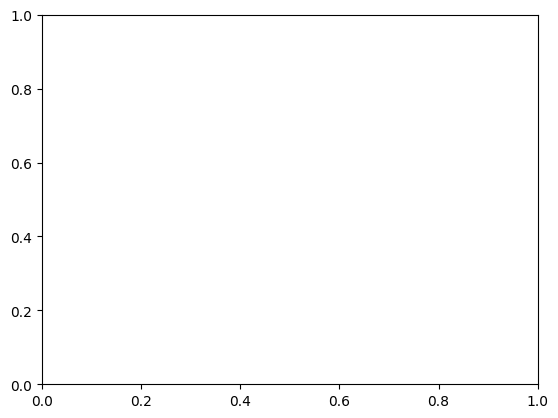

In [116]:
from IPython.display import display, clear_output
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111)
d = deque(maxlen=2)
d.append([0, 0])
i = 0

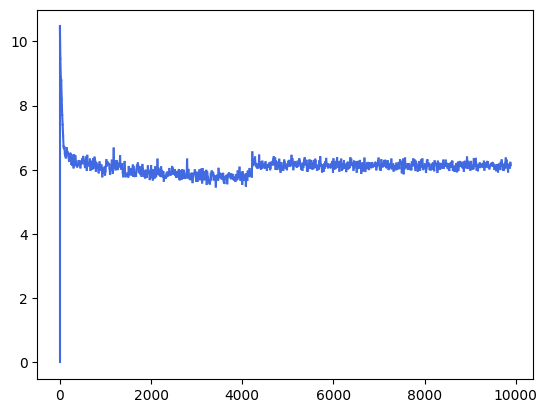

In [117]:
import numpy as np

epochs = 1
transformer.train()

for epoch in range(epochs):
    print(f'[Transformer] Epoch {epoch + 1}...')
    epoch_loss = 0.
    for i in range(0, X_train.size(0), 10):
        x_b = X_train[i:i + 10].to('cuda' if torch.cuda.is_available() else 'cpu')
        y_b = y_train[i:i + 10].to('cuda' if torch.cuda.is_available() else 'cpu')

        optimizer.zero_grad()
        outputs = transformer(x_b, y_b)
        loss_value = loss(outputs.permute(0, 2, 1), y_b)
        epoch_loss += loss_value.item()

        # # graph
        d.append([i, loss_value.item()])
        ax.plot(*zip(d[0], d[1]), color='royalblue')
        display(fig)
        clear_output(wait=True)
#         plt.pause(0.01)
        # #

        loss_value.backward()
        optimizer.step()
        torch.nn.utils.clip_grad_norm_(transformer.parameters(), 1)

    scheduler.step()
    ax.axvline(x=i, color='r')

In [118]:
optimizer.zero_grad()
output = transformer(X_test, y_test)

In [119]:
res = output.softmax(2).argmax(2)
decoded_en_sents = [en_tokenizer.decode(ids) for ids in res]
decoded_en_sents

['and the and and the the and and and the and the and the and the the and the and and and the and and the and and the the and and and and and and and the and and the and the and the and and and the and the and and the the the and the and and and the and the and and and the the and and and the and the the and and the the the and and the the the and and the the the and the and and and and the and the and and and and and and and and and the the the and the and the and the the the the and and and and the and and the the and the the and the and and the the and and and the the and the and and and the the and and the and the the the the the the the the and and and and and the the and and and and the and the and the and and the and and the and and and and and and the and the and and and and and and and and and the and and the and the and and and the and and the and and the the and and the and and and and and and the and and and and the and and and and the and and and and and the and and the an

In [120]:
decoded_en_sents2 = [en_tokenizer.decode(ids) for ids in y_test]
decoded_en_sents2

['[CLS] go home with his shoes still tied in a knot but lily had an idea she remembered her dad had a dull pencil in his pocket she ran home to get it and brought it back to jack together they used the pencil to loosen the knot and jacks shoes were finally untied from that day on lily and jack played together every day in the park they were happy they had met and become friends [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [

## Попытка номер два

In [127]:
class SelfAttention(nn.Module):
    def __init__(self, embed_size):
        super(SelfAttention, self).__init__()
        self.embed_size = embed_size

        self.values = nn.Linear(embed_size, embed_size, bias=False)
        self.keys = nn.Linear(embed_size, embed_size, bias=False)
        self.queries = nn.Linear(embed_size, embed_size, bias=False)

        self.fc_out = nn.Linear(embed_size, embed_size)

    def forward(self, x, mask=None):
        N, seq_length, embed_size = x.shape

        queries = self.queries(x)
        keys = self.keys(x)
        values = self.values(x)

        energy = torch.bmm(queries, keys.permute(0, 2, 1))
        energy /= np.sqrt(self.embed_size)

        if mask is not None:
            energy = energy.masked_fill(mask == 0, float('-1e20'))

        attention = F.softmax(energy, dim=2)
        out = torch.bmm(attention, values)

        return self.fc_out(out)

In [128]:
class DecoderLayer(nn.Module):
    def __init__(self, embed_size, forward_expansion):
        super(DecoderLayer, self).__init__()
        self.self_attention = SelfAttention(embed_size)
        self.norm1 = nn.LayerNorm(embed_size)
        self.norm2 = nn.LayerNorm(embed_size)

        # Фидфорвардный слой - Многослойный перцептрон
        self.feed_forward = nn.Sequential(
            nn.Linear(embed_size, forward_expansion * embed_size),
            nn.ReLU(),
            nn.Linear(forward_expansion * embed_size, embed_size),
        )

    def forward(self, x, mask=None):
        # Самовнимание
        attention = self.self_attention(x, mask)

        # Резидуальная связь + нормализация
        x = self.norm1(attention + x)

        # Feedforward + резидуальная связь + нормализация
        forward = self.feed_forward(x)
        x = self.norm2(forward + x)

        return x

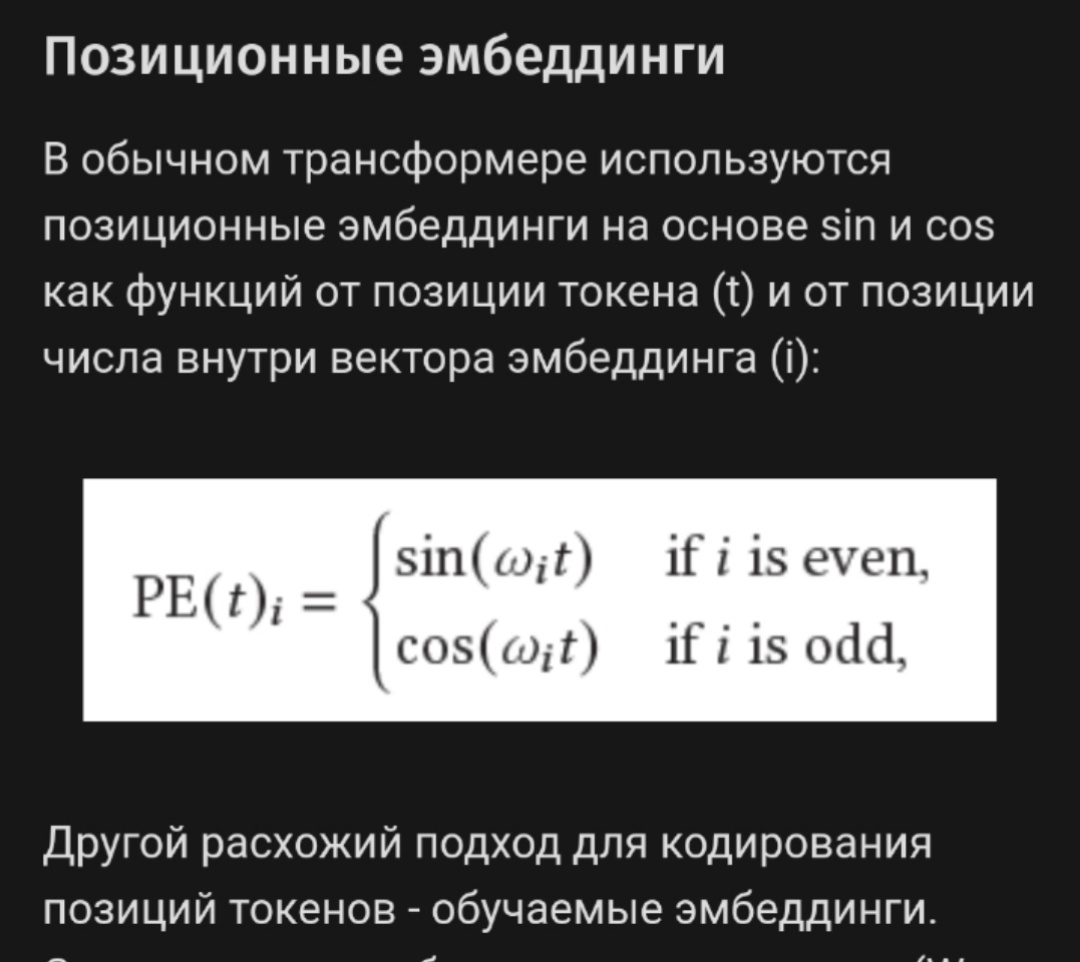

In [129]:
class DecoderOnlyModel(nn.Module):
    def __init__(self, embed_size, num_layers, forward_expansion, vocab_size, max_length):
        super(DecoderOnlyModel, self).__init__()
        self.embed_size = embed_size
        self.word_embedding = nn.Embedding(vocab_size, embed_size)  # Словарные эмбеддинги
        self.position_embedding = nn.Embedding(max_length, embed_size)  # Позиционные эмбеддинги

        # Стек декодеров
        self.layers = nn.ModuleList(
            [DecoderLayer(embed_size, forward_expansion) for _ in range(num_layers)]
        )
        self.fc_out = nn.Linear(embed_size, vocab_size)  # Финальный линейный слой

    def forward(self, x, mask=None):
        N, seq_length = x.shape
        positions = torch.arange(0, seq_length).expand(N, seq_length).to(x.device)

        # Добавляем словарные и позиционные эмбеддинги
        out = self.word_embedding(x) + self.position_embedding(positions)

        # Пропускаем через декодеры
        for layer in self.layers:
            out = layer(out, mask)

        return self.fc_out(out)

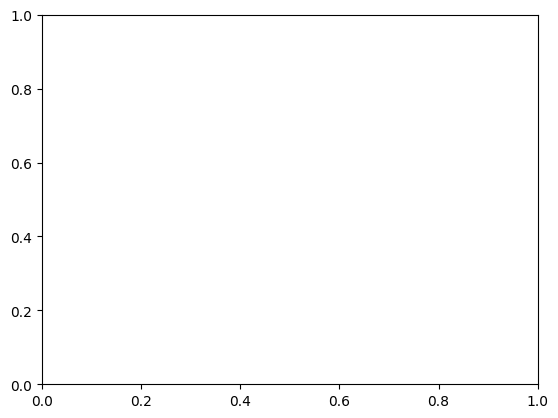

In [133]:
from IPython.display import display, clear_output
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111)
d = deque(maxlen=2)
d.append([0, 0])
i = 0

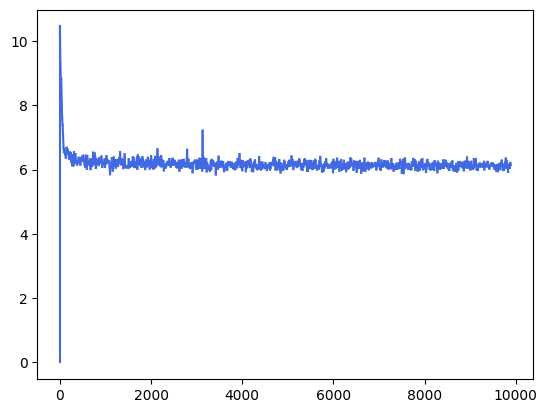

In [134]:
embed_size = 444         # Размер эмбеддингов
num_layers = 4            # Число декодеров
forward_expansion = 4     # Коэффициент увеличения эмбеддингов в FF слоях
vocab_size = en_tokenizer.vocab_size         # Размер словаря (количество уникальных токенов)
max_length = 500         # Максимальная длина последовательности

# Создаем модель
model = DecoderOnlyModel(embed_size, num_layers, forward_expansion, vocab_size, max_length)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=5, T_mult=2)
epochs = 1

for epoch in range(epochs):
    print(f'Epoch {epoch + 1}...')
    epoch_loss = 0.
    for i in range(0, X_train.size(0), 10):
        x_b = X_train[i:i + 10].to('cuda' if torch.cuda.is_available() else 'cpu')
        y_b = y_train[i:i + 10].to('cuda' if torch.cuda.is_available() else 'cpu')

        optimizer.zero_grad()
        outputs = model(x_b)
        loss_value = loss(outputs.permute(0, 2, 1), y_b)
        epoch_loss += loss_value.item()

        # # graph
        d.append([i, loss_value.item()])
        ax.plot(*zip(d[0], d[1]), color='royalblue')
        display(fig)
        clear_output(wait=True)
#         plt.pause(0.01)
        # #

        loss_value.backward()
        optimizer.step()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1)

    scheduler.step()
    ax.axvline(x=i, color='r')

In [135]:
optimizer.zero_grad()
output = model(X_test)

In [136]:
res = output.softmax(2).argmax(2)
decoded_en_sents = [en_tokenizer.decode(ids) for ids in res]
decoded_en_sents

['and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and and an

In [137]:
decoded_en_sents2 = [en_tokenizer.decode(ids) for ids in y_test]
decoded_en_sents2

['[CLS] go home with his shoes still tied in a knot but lily had an idea she remembered her dad had a dull pencil in his pocket she ran home to get it and brought it back to jack together they used the pencil to loosen the knot and jacks shoes were finally untied from that day on lily and jack played together every day in the park they were happy they had met and become friends [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [